In [1]:
import warnings
import numpy as np
from model import BIO_GNN
import matplotlib.pyplot as plt
import scipy
import memory_profiler
from memory_profiler import memory_usage

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Arial', 'Liberation Serif']

#### 1. inspect

#### 2. data preprocessing

In [2]:
def normalize_matrix(connectivity_matrix):
    np.fill_diagonal(connectivity_matrix, 0)
    connectivity_matrix[np.logical_or(np.isinf(connectivity_matrix), np.isnan(connectivity_matrix))] = 0
    connectivity_matrix = connectivity_matrix.astype(float)
    
    return connectivity_matrix

In [3]:
connectivity_matrices_asd = []

for i in range(1, 42):
    mat = scipy.io.loadmat(f'data_ad_lmci_L/data_ad_lmci_L/AD_LH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_asd.append(connectivity_matrix)

connectivity_matrices_asd = np.stack(connectivity_matrices_asd)



In [4]:
Dataset = "E" 
N_Subjects = 155
N_Nodes = 35
N_views = 6
N_max_epochs = 500
early_stop =  True
random_sample_size = 10
n_folds = 5
lr = 0.005
model_name = "demo"
CONV1 = CONV2 = CONV3 = 8

lambda_r = 100
lambda_b = 50
patience = 3
convergence_threshold = 0.01    

X = connectivity_matrices_asd
N_Subjects = X.shape[0]
N_Nodes = X.shape[1]
N_views = X.shape[3]


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 100.0 lambda b 50.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 48.69 | reservoir loss : 0.0890 | bio loss : 0.49649 | total loss: 82.41 | median cbt mc 9.55 | Time Elapsed: 12.14 | 
Epoch: 10  |  cbt loss : 15.92 | reservoir loss : 0.0850 | bio loss : 0.54204 | total loss: 51.53 | median cbt mc 9.51 | Time Elapsed: 30.55 | 
Epoch: 20  |  cbt loss : 12.73 | reservoir loss : 0.0836 | bio loss : 0.32332 | total loss: 37.25 | median cbt mc 10.46 | Time Elapsed: 27.28 | 
Epoch: 30  |  cbt loss : 12.19 | reservoir loss : 0.0832 | bio loss : 0.30493 | total loss: 35.76 | median cbt mc 10.43 | Time Elapsed: 21.19 | 
Epoch: 40  |  cbt loss : 12.16 | reservoir loss : 0.0831 | bio loss : 0.30414 | total loss: 35.67 | median cbt mc 10.43 | Time Elapsed: 18.75 | 
Epoch: 50  |  cbt loss : 12.29 | reservoir loss : 0.0831 | bio loss : 0.30428 | total loss: 35.81 | median cbt mc 10.43 | Time Elapsed: 18.48 | 
Epoch: 60  |  cbt loss : 12.36 | reservoir loss : 0.0831 | bio loss : 0.30833

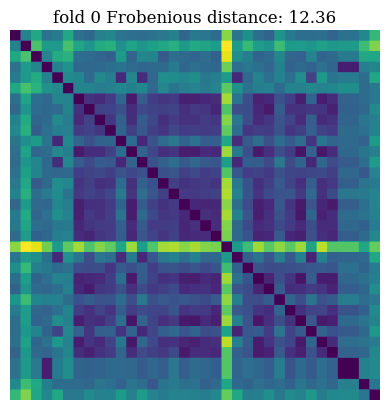

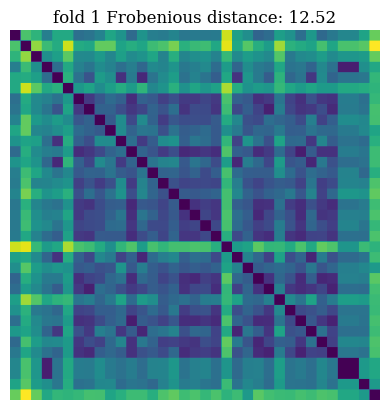

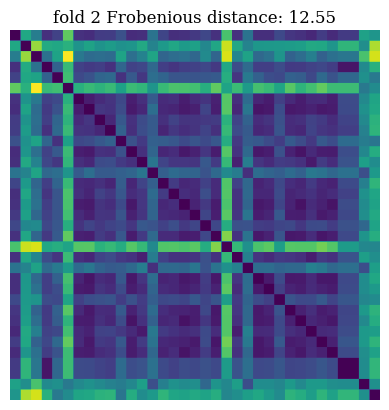

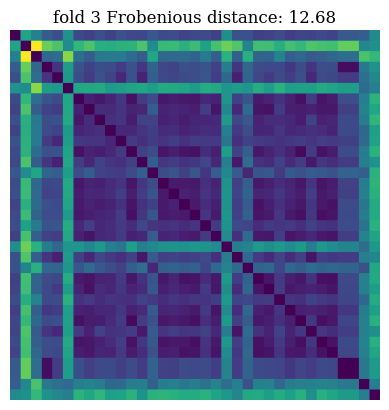

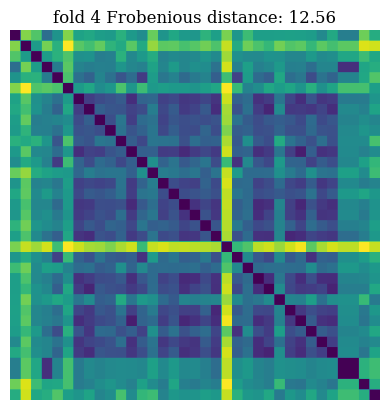

Maximum memory usage: 546.11328125 MB


In [5]:
def train_model_with_profiling():
    np.random.seed(35813)
    models = BIO_GNN.train_model(
        CONFIG["X"],
        model_params=MODEL_PARAMS,
        n_max_epochs=CONFIG["N_max_epochs"],
        n_folds=CONFIG["n_folds"],
        random_sample_size=CONFIG["random_sample_size"],
        early_stop=CONFIG["early_stop"],
        model_name=CONFIG["model_name"]
    )
    return models

# Profile memory usage
mem_usage = memory_usage(train_model_with_profiling, interval=1, timeout=1)
max_mem_usage = max(mem_usage)

print(f"Maximum memory usage: {max_mem_usage} MB")